In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

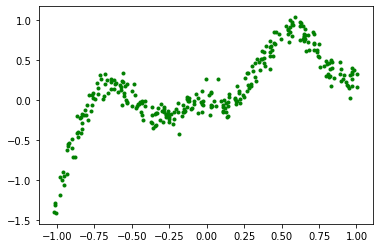

In [4]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)
xx = np.c_[x,y]

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Doing NonLinear Autoencoder (3 Layers)

In [9]:
optimizer = tnn.Adam()

n_hidden1 = 5
n_hidden2 = 5
net = tnn.AutoForm(new_layers=True)
e1 = tnn.NonLinearLayer(2, n_hidden1, activation=tnn.LeakyRelu(), optimizer=optimizer)
e2 = tnn.NonLinearLayer(n_hidden1, n_hidden2, activation=tnn.LeakyRelu(), optimizer=optimizer)
e3 = tnn.LinearLayer(n_hidden2, 1, optimizer=optimizer)

d3 = tnn.NonLinearLayer(1, n_hidden2, activation=tnn.LeakyRelu(), optimizer=optimizer)
d2 = tnn.NonLinearLayer(n_hidden2, n_hidden1, activation=tnn.LeakyRelu(), optimizer=optimizer)
d1 = tnn.LinearLayer(n_hidden1, 2, optimizer=optimizer)

In [10]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    d3.weights = e3.weights.T
    yy = net.forward(xx)
    
    dy = yy-xx
    dx = net.backward(dy)

    loss = (dy**2).mean()
    net.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.2634363509329489

_______________________
epoch 10
Loss 0.17962362002448373

_______________________
epoch 20
Loss 0.09636788553415672

_______________________
epoch 30
Loss 0.064855534222487

_______________________
epoch 40
Loss 0.040755562360296975

_______________________
epoch 50
Loss 0.034569732475092915

_______________________
epoch 60
Loss 0.02950267828036397

_______________________
epoch 70
Loss 0.02819858518854226

_______________________
epoch 80
Loss 0.027167545579416686

_______________________
epoch 90
Loss 0.026070633802760174

_______________________
epoch 100
Loss 0.024939616973897436

_______________________
epoch 110
Loss 0.023852752870795288

_______________________
epoch 120
Loss 0.022911385455653036

_______________________
epoch 130
Loss 0.022039305164157627

_______________________
epoch 140
Loss 0.021273151559379967

_______________________
epoch 150
Loss 0.02060987563774455

_______________________
epoch 160
Loss 0.0200


_______________________
epoch 1350
Loss 0.009395295015779986

_______________________
epoch 1360
Loss 0.009427198963568601

_______________________
epoch 1370
Loss 0.009385294826784645

_______________________
epoch 1380
Loss 0.009633696271587978

_______________________
epoch 1390
Loss 0.009394751693735152

_______________________
epoch 1400
Loss 0.009462426995853312

_______________________
epoch 1410
Loss 0.009869386290621512

_______________________
epoch 1420
Loss 0.009542398442776075

_______________________
epoch 1430
Loss 0.009725966831384108

_______________________
epoch 1440
Loss 0.010196929272528774

_______________________
epoch 1450
Loss 0.009391716345242442

_______________________
epoch 1460
Loss 0.009404174511482987

_______________________
epoch 1470
Loss 0.00946579948112068

_______________________
epoch 1480
Loss 0.009389816607314675

_______________________
epoch 1490
Loss 0.00935277751035205

_______________________
epoch 1500
Loss 0.009360820500531053

_________


_______________________
epoch 2690
Loss 0.01030844577997426

_______________________
epoch 2700
Loss 0.009469729590479483

_______________________
epoch 2710
Loss 0.009418375506307853

_______________________
epoch 2720
Loss 0.009390961618248444

_______________________
epoch 2730
Loss 0.009394435697187955

_______________________
epoch 2740
Loss 0.009381344600507904

_______________________
epoch 2750
Loss 0.009381077858920367

_______________________
epoch 2760
Loss 0.009413497833154417

_______________________
epoch 2770
Loss 0.009402302817458668

_______________________
epoch 2780
Loss 0.00946063752696934

_______________________
epoch 2790
Loss 0.009710858756489398

_______________________
epoch 2800
Loss 0.009822617122085419

_______________________
epoch 2810
Loss 0.009400385928555606

_______________________
epoch 2820
Loss 0.009678905043533626

_______________________
epoch 2830
Loss 0.009528683587638618

_______________________
epoch 2840
Loss 0.009420250950304559

_________


_______________________
epoch 4030
Loss 0.009346473615816843

_______________________
epoch 4040
Loss 0.00948271176526936

_______________________
epoch 4050
Loss 0.009425219020695319

_______________________
epoch 4060
Loss 0.009391974315964375

_______________________
epoch 4070
Loss 0.011553002669664187

_______________________
epoch 4080
Loss 0.010409854251324365

_______________________
epoch 4090
Loss 0.02140794512463239

_______________________
epoch 4100
Loss 0.02255271164810375

_______________________
epoch 4110
Loss 0.017428908379976182

_______________________
epoch 4120
Loss 0.016538669428723476

_______________________
epoch 4130
Loss 0.015714237375758656

_______________________
epoch 4140
Loss 0.015159162628393974

_______________________
epoch 4150
Loss 0.011758967855629732

_______________________
epoch 4160
Loss 0.010744342248128824

_______________________
epoch 4170
Loss 0.010372502577351384

_______________________
epoch 4180
Loss 0.010337469197121137

__________

TclError: invalid command name "pyimage50"

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
plt.legend()
plt.show()

In [81]:
d3.input

array([[ 2.40735272],
       [ 2.29791333],
       [ 2.24634769],
       [ 2.25027968],
       [ 2.27770412],
       [ 2.24618639],
       [ 2.24635349],
       [ 2.20147473],
       [ 2.19129724],
       [ 2.16143048],
       [ 2.0823388 ],
       [ 2.11585317],
       [ 2.09448222],
       [ 2.08408913],
       [ 2.07219707],
       [ 2.06918098],
       [ 2.01170102],
       [ 2.0487408 ],
       [ 2.01223401],
       [ 2.00062002],
       [ 1.9954523 ],
       [ 1.97218492],
       [ 1.96886595],
       [ 1.94283286],
       [ 1.92408094],
       [ 1.89523652],
       [ 1.90773832],
       [ 1.87624306],
       [ 1.86084408],
       [ 1.85988731],
       [ 1.83712046],
       [ 1.85244785],
       [ 1.82614166],
       [ 1.79434646],
       [ 1.7579114 ],
       [ 1.76575923],
       [ 1.73354006],
       [ 1.74047056],
       [ 1.72682408],
       [ 1.70190199],
       [ 1.71110734],
       [ 1.70862118],
       [ 1.66803987],
       [ 1.69114768],
       [ 1.679871  ],
       [ 1

### Doing Non-Linear encoding

In [11]:
optimizer = tnn.Adam()

net1 = tnn.AutoForm(new_layers=True)
e1 = tnn.NonLinearLayer(2, 1, activation=tnn.Relu(), optimizer=optimizer)
d1 = tnn.LinearLayer(1, 2, optimizer=optimizer)

net2 = tnn.AutoForm(new_layers=True)
e2 = tnn.NonLinearLayer(2, 1, activation=tnn.Relu(), optimizer=optimizer)
d2 = tnn.LinearLayer(1, 2, optimizer=optimizer)

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    yy = net1.forward(xx)
    
    dy = yy-xx
    mask = e1.activation.x>0
    dy = dy*mask
    dx = net1.backward(dy)

    loss = (dy**2).mean()
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
#         if loss < 0.0025:
#             print('fitted to our expectation')
#             plt.pause(50)
#             break

_______________________
epoch 0
Loss 0.8852269151191302

_______________________
epoch 10
Loss 0.47900662713653136

_______________________
epoch 20
Loss 0.2416201081925538

_______________________
epoch 30
Loss 0.11644410284708047

_______________________
epoch 40
Loss 0.04683902111574471

_______________________
epoch 50
Loss 0.02346936172500331

_______________________
epoch 60
Loss 0.013489911300991902

_______________________
epoch 70
Loss 0.007598480000926563

_______________________
epoch 80
Loss 0.0050787108357276105

_______________________
epoch 90
Loss 0.0036877695918903263

_______________________
epoch 100
Loss 0.002445080351380306

_______________________
epoch 110
Loss 0.0019983848743197023

_______________________
epoch 120
Loss 0.0019127871857333855

_______________________
epoch 130
Loss 0.0008159501454038315

_______________________
epoch 140
Loss 0.0007963625259401131

_______________________
epoch 150
Loss 0.0007814634849442193

_______________________
epoch 160
Lo

TclError: invalid command name "pyimage72"